3. Multivariate Analysis (15 poin)

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?

B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

C:\Users\purwa\AppData\Local\Temp\ipykernel_15268\1707564373.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot = True, fmt = '.2f')


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


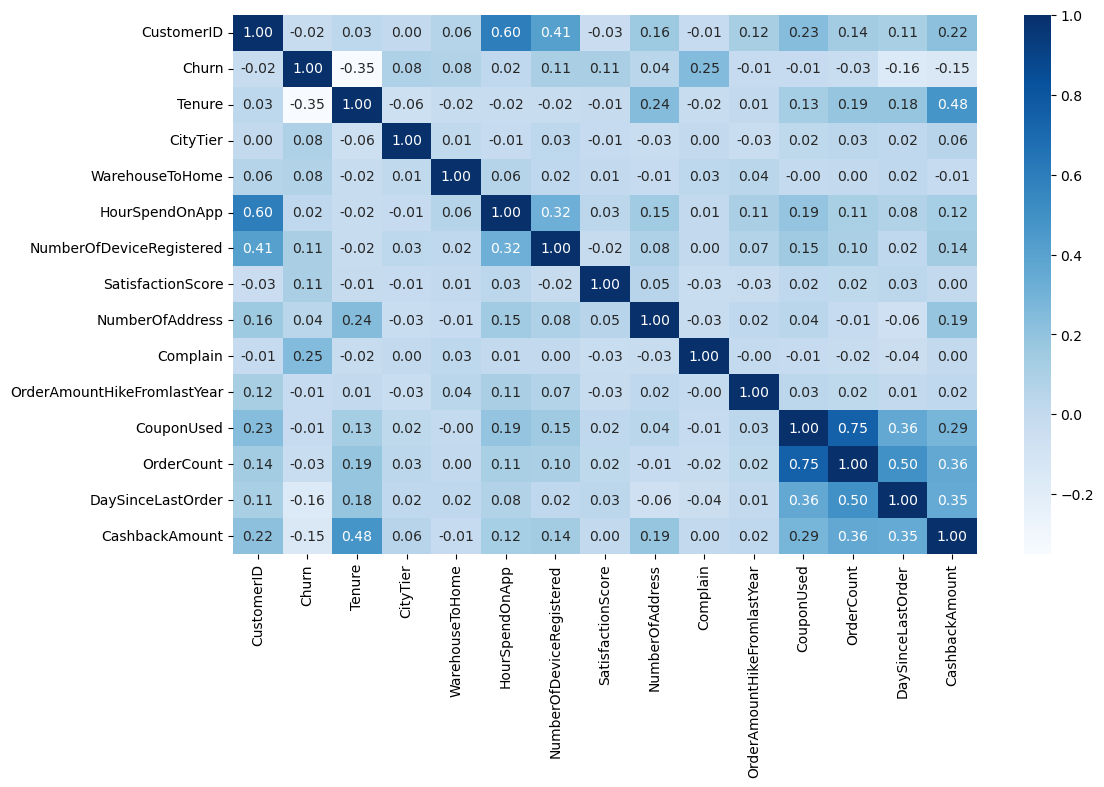

In [2]:
df = pd.read_excel('C:/Users/purwa/Downloads/E Commerce Dataset (1).xlsx')
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(), cmap='Blues', annot = True, fmt = '.2f')
df.head()

Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

Dari heatmap tersebut dapat dilihat bahwa kolom yang memiliki korelasi linear terbesar yaitu antara 'CouponUsed' dan 'OrderCount' mencapai 0.75. Fokus project kali ini yaitu Churn pelanggan sehingga apabila dilihat dari 'Churn', fitur yang memiliki korelasi terbesar yaitu 'Complain' bernilai 0.25. Oleh karena itu, dilakukan perincian lebih lanjut untuk fitur tersebut pada barplot di bawah:

<Axes: xlabel='Churn', ylabel='Complain'>

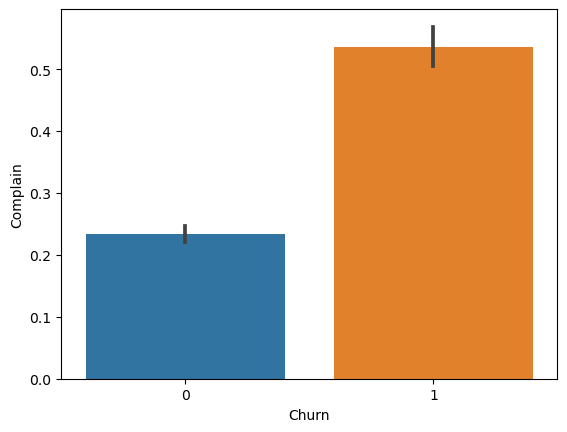

In [27]:
sns.barplot(data = df, x = 'Churn', y = 'Complain')

Dari data tersebut dapat terlihat bahwa rata-rata Complain pelanggan meningkat dari pelanggan yang tidak churn dan churn secara linear dengan korelasi 0.25.

Sementara itu, beberapa fitur bersifat kategorikal yang tidak terbaca di heatmap. Sehingga dilakukan korelasi linear pearson menggunakan one-hot encoding terhadap fitur 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus' seperti berikut:

In [23]:
X = df[['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']]
X = pd.get_dummies(data=X, drop_first=True)
Y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
predictions = model.predict(X_test)
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     22.06
Date:                Sat, 21 Oct 2023   Prob (F-statistic):           7.37e-62
Time:                        01:41:15   Log-Likelihood:                -1309.3
No. Observations:                3378   AIC:                             2653.
Df Residuals:                    3361   BIC:                             2757.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Dari regresi tersebut, dapat disimpulkan bahwa fitur-fitur kategorikal tersebut memiliki korelasi yang sangat rendah terhadap Churn pada Multivariate Regression.